# Procesamiento de Imágenes - Trabajo Práctico N°5
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 6 - Reducción del efecto de ruido periódico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color, data, restoration

(294, 294)


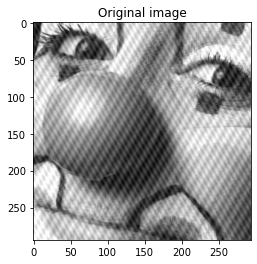

In [2]:
# Open image
img = np.array(Image.open('../../consigna//clown.jpg').convert('L'))/255.0

# Plot image
plt.title('Original image')
plt.imshow(img, cmap='gray');
print(img.shape)


Text(0.5, 1.0, 'Espectro')

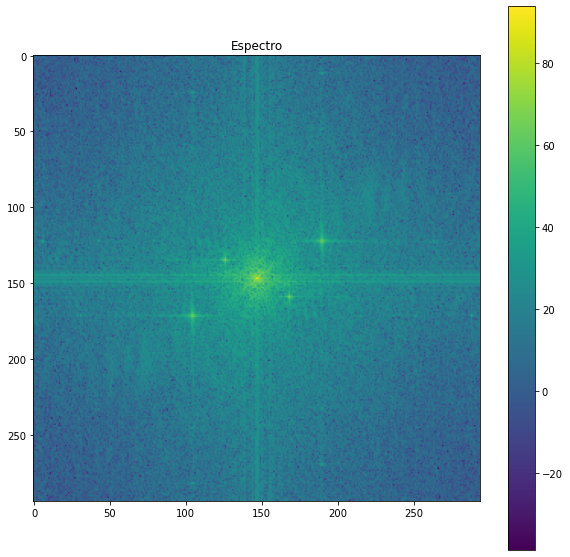

In [3]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
# Plot image
fig = plt.figure(figsize = (10,10))
plt.imshow(20*np.log10(abs(img_fft)))
plt.colorbar()
plt.title("Espectro")


Text(0.5, 1.0, 'Espectro filtrado')

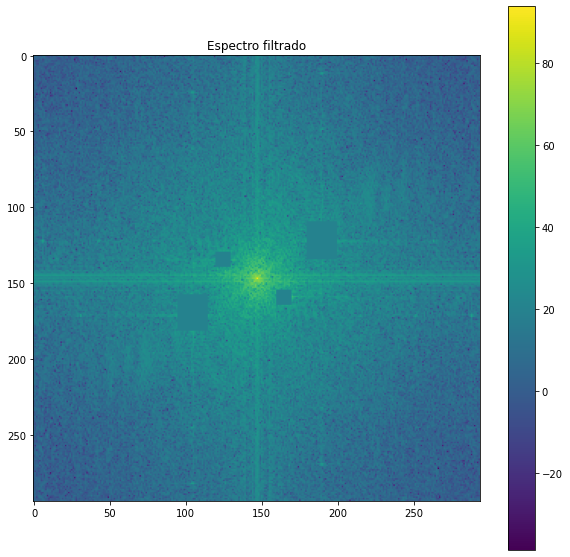

In [4]:
fft_changed = img_fft.copy()

replace_val = 10

# Se reemplaza cada uno de los puntos que aparecen en el espectro excepto por el central.
for x in range(180,200):
  for y in range(110,135):
    fft_changed[y][x] = replace_val

for x in range(95,115):
  for y in range(158,182):
    fft_changed[y][x] = replace_val

for x in range(120,130):
  for y in range(130,140):
    fft_changed[y][x] = replace_val
    
for x in range(160,170):
  for y in range(155,165):
    fft_changed[y][x] = replace_val

fig = plt.figure(figsize = (10,10))
plt.imshow(20*np.log10(abs(fft_changed)))
plt.colorbar()
plt.title("Espectro filtrado")

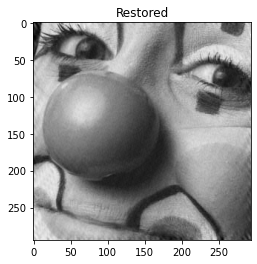

In [5]:
rem = np.abs(np.fft.ifft2(fft_changed))
plt.title('Restored')
plt.imshow(rem, cmap='gray');

Text(0.5, 1.0, 'Restored')

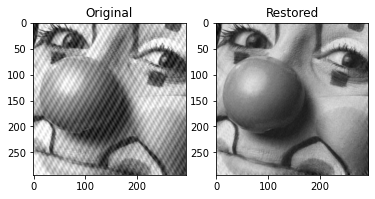

In [6]:
# Plot image
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray');
ax[0].set_title('Original')
ax[1].imshow(rem, cmap='gray');
ax[1].set_title('Restored')